In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

### Read data 

In [3]:
train = pd.read_json('data/train.json')
test = pd.read_json('data/test.json')

In [4]:
print train.shape
print test.shape

(49352, 15)
(74659, 14)


In [5]:
train[:3]

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street


In [6]:
train.dtypes

bathrooms          float64
bedrooms             int64
building_id         object
created             object
description         object
display_address     object
features            object
interest_level      object
latitude           float64
listing_id           int64
longitude          float64
manager_id          object
photos              object
price                int64
street_address      object
dtype: object

Check the number of NaN values

In [7]:
train.isnull().sum()

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
interest_level     0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
dtype: int64

In [8]:
test.isnull().sum()

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
dtype: int64

### Feature engineering 

#### 1. Bathrooms & bedrooms

In [9]:
train.bathrooms.value_counts()

1.0     39422
2.0      7660
3.0       745
1.5       645
0.0       313
2.5       277
4.0       159
3.5        70
4.5        29
5.0        20
5.5         5
6.0         4
6.5         1
10.0        1
7.0         1
Name: bathrooms, dtype: int64

In [10]:
train.bedrooms.value_counts()

1    15752
2    14623
0     9475
3     7276
4     1929
5      247
6       46
8        2
7        2
Name: bedrooms, dtype: int64

#### 2.  building_id & manager_id & listing_id

In [11]:
# Number of unique building ids
print 'unique buildings:', len(set(train.building_id))
print 'percentage:', len(set(train.building_id)) / float(len(train))

unique buildings: 7585
percentage: 0.153691846328


In [12]:
# Number of unique manager ids
print 'unique managers:', len(set(train.manager_id))
print 'percentage:', len(set(train.manager_id)) / float(len(train))

unique managers: 3481
percentage: 0.070534122224


In [13]:
# Number of unique listing ids
print 'unique listings:', len(set(train.listing_id))
print 'percentage:', len(set(train.listing_id)) / float(len(train))

unique listings: 49352
percentage: 1.0


Listing id is a feature to remove

#### 3.1 Description 

In [14]:
from bs4 import BeautifulSoup

In [15]:
print train.ix[10].description

A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy These Following Apartment Features As You Rent Here? Modern Designed Bathroom w/ a Deep Spa Soaking Tub? Room to Room AC/Heat? Real Oak Hardwood Floors? Rain Forest Shower Head? SS steel Appliances w/ Chef Gas Cook Oven & LG Fridge? washer /dryer in the apt? Cable Internet Ready? Granite Counter Top Kitchen w/ lot of cabinet storage spaceIt's Just A Few blocks To L Train<br /><br />Don't miss out!<br /><br />We have several great apartments in the immediate area.<br /><br />For additional information 687-878-2229<p><a  website_redacted 


In [16]:
souped_text = BeautifulSoup(train.ix[10].description, 'html.parser').get_text(separator=' ')
print souped_text

A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy These Following Apartment Features As You Rent Here? Modern Designed Bathroom w/ a Deep Spa Soaking Tub? Room to Room AC/Heat? Real Oak Hardwood Floors? Rain Forest Shower Head? SS steel Appliances w/ Chef Gas Cook Oven & LG Fridge? washer /dryer in the apt? Cable Internet Ready? Granite Counter Top Kitchen w/ lot of cabinet storage spaceIt's Just A Few blocks To L Train Don't miss out! We have several great apartments in the immediate area. For additional information 687-878-2229


In [17]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
import string
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

class StemTokenizer():
    def stem_tokens(self, tokens, stemmer):
        return [stemmer.stem(item) for item in tokens]

    def remove_punctuation(self, tokens):
        return [i for i in tokens if i not in string.punctuation]

    def __init__(self):
        self.stemmer = SnowballStemmer("english", ignore_stopwords=True)

    def __call__(self, doc):
        tokens = self.remove_punctuation(word_tokenize(doc))
        return self.stem_tokens(tokens, self.stemmer)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

vocab = ['The swimmer likes swimming so he swims.']
vect = CountVectorizer(tokenizer=StemTokenizer(), stop_words=stopwords.words('english')) 

vect.fit(vocab)
sentence1 = vect.transform(['The swimmer likes swimming.'])
sentence2 = vect.transform(['The swimmer swims.'])

print('Vocabulary: %s' %vect.get_feature_names())
print('Sentence 1: %s' %sentence1.toarray())
print('Sentence 2: %s' %sentence2.toarray())

Vocabulary: [u'like', u'swim', u'swimmer']
Sentence 1: [[1 1 1]]
Sentence 2: [[0 1 1]]


#### 3.2 Features 

In [24]:
train.ix[10000].features

[u'Doorman', u'Elevator', u'Fitness Center', u'Cats Allowed', u'Dogs Allowed']

#### 4. Coordinates

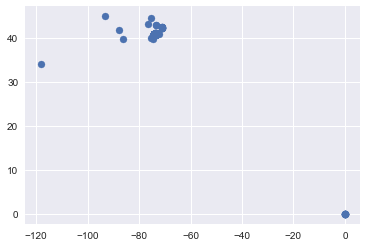

In [55]:
plt.scatter(train.longitude, train.latitude)

Check threshold values

In [56]:
zero_coords_num = len(train[(train.longitude == 0) | (train.latitude == 0)])
print 'Number of zero-coords apts:', zero_coords_num
print '% of zero-coords apts:', float(zero_coords_num) / len(train)

Number of zero-coords apts: 12
% of zero-coords apts: 0.000243151240071


In [57]:
# And for test dataset by the same way
zero_coords_num_test = len(test[(test.longitude == 0) | (test.latitude == 0)])
print 'Number of zero-coords apts:', zero_coords_num_test
print '% of zero-coords apts:', float(zero_coords_num_test) / len(test)

Number of zero-coords apts: 27
% of zero-coords apts: 0.000361644275975


In [58]:
train.loc[(train.longitude < -74.4) | (train.longitude > -73.6), 'interest_level'].value_counts()

low       40
medium     3
Name: interest_level, dtype: int64

Zoom in the map with valid coords

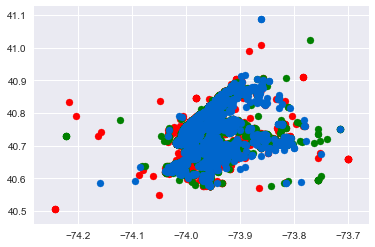

In [59]:
zoomed_in_coords_low = train[
    (train.longitude > -74.4) & (train.longitude < -73.6) & (train.interest_level == 'low')
][['longitude', 'latitude']]
zoomed_in_coords_med = train[
    (train.longitude > -74.4) & (train.longitude < -73.6) & (train.interest_level == 'medium')
][['longitude', 'latitude']]
zoomed_in_coords_hight = train[
    (train.longitude > -74.4) & (train.longitude < -73.6) & (train.interest_level == 'high')
][['longitude', 'latitude']]

plt.scatter(zoomed_in_coords_low.longitude, zoomed_in_coords_low.latitude, c='r')
plt.scatter(zoomed_in_coords_med.longitude, zoomed_in_coords_med.latitude, c='g')
plt.scatter(zoomed_in_coords_hight.longitude, zoomed_in_coords_hight.latitude, c='#0066cc')
plt.show()

#### 5. Interest level

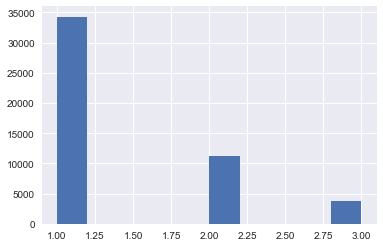

In [60]:
train.interest_level.apply(lambda x: 1 if x == 'low' else 2 if x == 'medium' else 3).hist()

In [107]:
print len(train[train.interest_level == 'low']) / float(len(train)) * 100
print len(train[train.interest_level == 'medium']) / float(len(train)) * 100
print len(train[train.interest_level == 'high']) / float(len(train)) * 100

69.4683092884
22.7528772897
7.77881342195


### Generate features 

In [ ]:
def generate_features(data):
    data["num_photos"] = data["photos"].apply(len)
    data["num_features"] = data["features"].apply(len)
    data["num_description_words"] = data["description"].apply(lambda x: len(x.split(" ")))
    data["created"] = pd.to_datetime(data["created"])

    ### Separate date and time
    data["created_year"] = data["created"].dt.year
    data["created_month"] = data["created"].dt.month
    data["created_day"] = data["created"].dt.day
    data["created_dow"] = data["created"].dt.dayofweek
    data["created_hour"] = data["created"].dt.hour
    
    if 'interest_level' in data.columns:
        target_num_map = {'high':0, 'medium':1, 'low':2}
        data.interest_level = data.interest_level.apply(lambda x: target_num_map[x])

In [ ]:
generate_features(train)
generate_features(test)

#### Label Encoder

In [24]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
categorical = ["building_id", "display_address", "manager_id"]

for c in categorical:
    encoder.fit(list(train[c].values) + list(test[c].values))
    train[c] = encoder.transform(train[c])
    test[c] = encoder.transform(test[c])

In [25]:
train.columns.values

array([u'bathrooms', u'bedrooms', u'building_id', u'created',
       u'description', u'display_address', u'features', u'interest_level',
       u'latitude', u'listing_id', u'longitude', u'manager_id', u'photos',
       u'price', u'street_address', 'num_photos', 'num_features',
       'num_description_words', 'created_year', 'created_month',
       'created_day', 'created_hour'], dtype=object)

In [96]:
good_features = ['bathrooms', 'bedrooms', 'building_id', 'display_address', 
                'latitude', 'longitude', 'manager_id', 'price', 'num_photos',
                'num_features', 'num_description_words', 'created_month',
                'created_day', 'created_dow', 'created_hour', 'interest_level']

x_features = good_features[:-1]

In [66]:
train[good_features].head()

,bathrooms,bedrooms,latitude,longitude,price,num_photos,num_features,num_description_words,created_year,created_month,created_day,interest_level
10,1.5,3,40.7145,-73.9425,3000,5,0,95,2016,6,24,medium
10000,1.0,2,40.7947,-73.9667,5465,11,5,9,2016,6,12,low
100004,1.0,1,40.7388,-74.0018,2850,8,4,94,2016,4,17,high
100007,1.0,1,40.7539,-73.9677,3275,3,2,80,2016,4,18,low
100013,1.0,4,40.8241,-73.9493,3350,3,1,68,2016,4,28,low


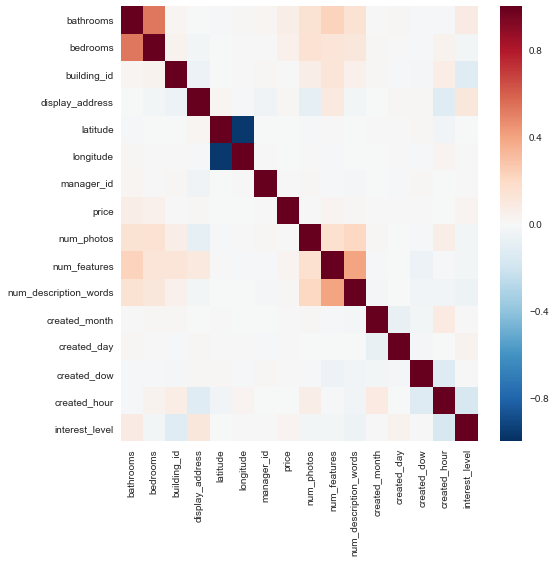

In [36]:
# Draw the correlation heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(train[good_features].corr())
plt.show()